# Задача №2

![image.png](images/problem2.png)

In [1]:
%matplotlib inline
import numpy as np
import sympy
from sympy.abc import x as sympy_x
from sympy.utilities.lambdify import implemented_function
import matplotlib.pyplot  as plt
from numpy import float32 as T
from collections.abc import Callable

Создадим функцию с помощью sympy, будет использована в методе Ньютона

$f(x) = tg(x) - x$

In [2]:
def sympy_func(x):
    return sympy.tan(x) - x

In [3]:
func_ = sympy.lambdify(sympy_x, sympy_func(sympy_x))
def func(x: T) -> T:
    return T(func_(T(x)))

Построим график

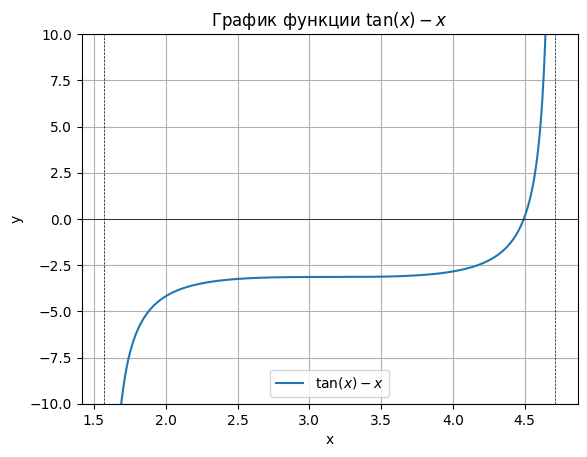

In [4]:
shift = 0.001
k = 1
a = -np.pi/2 + np.pi * k + shift
b = np.pi/2  + np.pi * k - shift
X = np.linspace(a, b, 1000, dtype=T)
Y = func(X)


plt.plot(X, Y, label=r'$\tan(x) - x$')

plt.axhline(0, color='black', linewidth=0.5)

plt.axvline(a, color='black', linestyle='--', linewidth=0.5)
plt.axvline(b, color='black', linestyle='--', linewidth=0.5)

plt.xlabel('x')
plt.ylabel('y')
plt.title(r'График функции $\tan(x) - x$')
plt.legend()
plt.grid(True)
plt.ylim(-10, 10) 
plt.show()

# 1. Метод бисекции

In [5]:
def bisection_method(f: Callable[[T], T], a: T, b: T, tol: T):
    """
    Метод бисекции для нахождения корня функции f на интервале [a, b]
    с точностью tol.
    """
    if f(a) * f(b) >= 0:
        raise ValueError("f(a) и f(b) должны иметь разные знаки")
    
    a_n, b_n = a, b
    it = 0
    while (b_n - a_n) / 2.0 > tol:
        midpoint = (a_n + b_n) / 2.0
        if f(midpoint) == 0:
            return midpoint
        elif f(a_n) * f(midpoint) < 0:
            b_n = midpoint
        else:
            a_n = midpoint
        it += 1
    return (a_n + b_n) / 2.0, it

Интервал $[a, b]$ должен содержать корень функции и значение функции на концах интервала должно быть разных знаков

In [6]:
tol =  10**-5
x0, it = bisection_method(func, a, b, tol)
print(f"Найденный корень: {x0}")
print(f"Количество итераций: {it}")
print(f"Значение функции в точке: {func(x0)}")
print(f"Погрешность: {tol}")

Найденный корень: 4.493408953789914
Количество итераций: 18
Значение функции в точке: -6.198883056640625e-06
Погрешность: 1e-05


# 2. Метод простых итераций

Решаем уравнение вида:
$$\phi(x) = x$$
где:
$\phi(x) = 1 - \lambda*f(x)$

In [7]:
def get_phi(func: Callable[[T], T], lambda_: T = T(1)) -> Callable[[T], T]:
    def phi(x: T) -> T:
        return x - lambda_ * func(x)
    return phi

In [8]:
def simple_iteration(func: Callable[[T], T], tol: T, x0: T, max_iter: int = 10**6, lambda_: T = 1) -> tuple[T, int]:
    """
    Метод простых итераций для нахождения корня функции func(x) = 0
    с начальным приближением x0, точностью tol и максимальным числом итераций max_iter.
    """
    x_n = x0
    for it in range(max_iter):
        phi = get_phi(func, lambda_)
        x_next = phi(x_n)
        if abs(x_next - x_n) < tol:
            return x_next, it
        x_n = x_next
    raise ValueError("Метод не сошелся за заданное число итераций")

In [9]:
tol = 10**-5

x_start = (a + b) / T(2)

x0, it = simple_iteration(func, tol, x_start, lambda_=0.05)

print(f"Найденный корень: {x0}")
print(f"Количество итераций: {it}")
print(f"Значение функции в точке: {func(x0)}")
print(f"Погрешность: {tol}")

Найденный корень: 4.493409367399761
Количество итераций: 12
Значение функции в точке: -6.198883056640625e-06
Погрешность: 1e-05


1) Значение $\lambda$ (корректирующего множителя) должно удовлетворять соотношению:
$$0 < \lambda < \frac{2}{\max(f(x))}$$

2) $f'(x) > 0$

Для всех $x$ из отрезка $[x_*, x_0]$

# 3. Метод Ньютона

In [10]:
sympy_diff = sympy.diff(sympy_func(sympy_x))
dfunc_ = sympy.lambdify(sympy_x, sympy_diff)
def dfunc(x: T) -> T:
    return T(dfunc_(T(x)))


In [11]:
def newton_method(f: Callable[[T], T], df: Callable[[T], T], x0: T, tol: T, max_iter: int = 10**6) -> tuple[T, int]:
    """
    Метод Ньютона для нахождения корня функции f с производной df,
    начальным приближением x0, точностью tol и максимальным числом итераций max_iter.
    """
    x_n = x0
    for it in range(max_iter):
        f_x_n = f(x_n)
        df_x_n = df(x_n)
        if df_x_n == 0:
            raise ValueError("Производная равна нулю, метод не применим")
        x_next = x_n - f_x_n / df_x_n
        if abs(x_next - x_n) < tol:
            return x_next, it
        x_n = x_next
    raise ValueError("Метод не сошелся за заданное число итераций")

In [12]:
tol = 10**-5

# В качестве начального приближения возьмем правую границу отрезка
x_start = b

x0, it = newton_method(func, dfunc, x_start, tol)

print(f"Найденный корень: {x0}")
print(f"Количество итераций: {it}")
print(f"Значение функции в точке: {func(x0)}")
print(f"Погрешность: {tol}")

Найденный корень: 4.493409546954061
Количество итераций: 12
Значение функции в точке: 3.337860107421875e-06
Погрешность: 1e-05


# 4. Метод секущих

In [14]:
def secant_method(f: Callable[[T], T], x0: T, x1: T, tol: T, max_iter: int = 10**6) -> tuple[T, int]:
    """
    Метод секущих для нахождения корня функции f
    с начальными приближениями x0 и x1, точностью tol и максимальным числом итераций max_iter.
    """
    for it in range(max_iter):
        f_x0 = f(x0)
        f_x1 = f(x1)
        if f_x1 == f_x0:
            raise ValueError("Деление на ноль в методе секущих")
        x2 = x1 - f_x1 * (x1 - x0) / (f_x1 - f_x0)
        if abs(x2 - x1) < tol:
            return x2, it
        x0, x1 = x1, x2
    raise ValueError("Метод не сошелся за заданное число итераций")

In [15]:
tol = 10**-5

# В качестве начального приближения возьмем правую границу отрезка
x_start = b
x_next = b - 10**-2

x0, it = secant_method(func, x_start, x_next, tol)

print(f"Найденный корень: {x0}")
print(f"Количество итераций: {it}")
print(f"Значение функции в точке: {func(x0)}")
print(f"Погрешность: {tol}")

Найденный корень: 4.493409517271716
Количество итераций: 12
Значение функции в точке: 3.337860107421875e-06
Погрешность: 1e-05


# Бассейн Ньютона

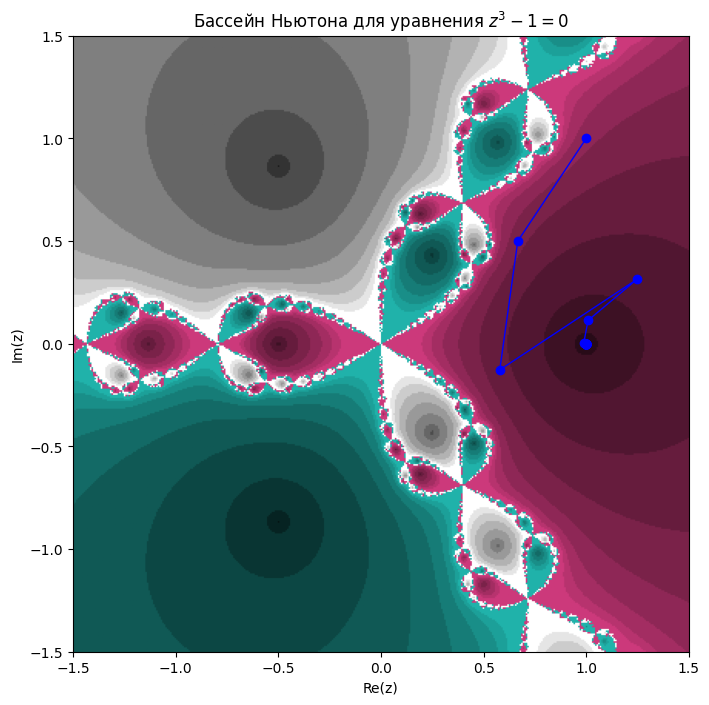

In [74]:
tol = 1e-5
max_iter = 1000
def complex_newton_method(z: np.complex64, tol=1e-5, max_iter=100):
    """
    Метод Ньютона для функции z^3 - 1 с начальным приближением z.
    Возвращает корень и количество итераций.
    """
    for i in range(max_iter):
        z_next = z - (z**3 - 1) / (3 * z**2)
        if abs(z_next - z) < tol:
            return z_next, i
        z = z_next
    return z, max_iter

scale = 1.5

# Создаем сетку комплексных чисел
x = np.linspace(-scale, scale, 400)
y = np.linspace(-scale, scale, 400)
X, Y = np.meshgrid(x, y)
Z = X + 1j * Y

# Применяем метод Ньютона ко всем точкам на сетке
roots = np.zeros(Z.shape, dtype=np.complex64)
iterations = np.zeros(Z.shape, dtype=int)
for i in range(Z.shape[0]):
    for j in range(Z.shape[1]):
        root, iter_count = complex_newton_method(Z[i, j], tol, max_iter)
        roots[i, j] = root
        iterations[i, j] = iter_count

# Определяем корни
root1 = 1
root2 = np.exp(2j * np.pi / 3)
root3 = np.exp(-2j * np.pi / 3)

# Создаем маски для каждого корня
mask1 = np.isclose(roots, root1, atol=1e-6)
mask2 = np.isclose(roots, root2, atol=1e-6)
mask3 = np.isclose(roots, root3, atol=1e-6)

# Создаем изображение
image = np.zeros(Z.shape + (3,), dtype=np.float32)

# Default colors
# image[mask1] = [1, 0, 0]  
# image[mask2] = [0, 1, 0]  
# image[mask3] = [0, 0, 1] 

# Custom colors
image[mask1] = [204 / 255, 57 / 255, 123 / 255]  # Fuchsia purple для корня 1
image[mask2] = [32 / 255, 178 / 255, 170 / 255]  # Light Sea Green для корня ω
image[mask3] = [255 / 255, 255 / 255, 255 / 255] # White для корня ω^2

# Наложение числа итераций для сходимости
iterations = iterations / 10
image[..., 0] *= np.clip(iterations, 0, 1)
image[..., 1] *= np.clip(iterations, 0, 1)
image[..., 2] *= np.clip(iterations, 0, 1)

# start_point = 0.7 + 1j
start_point = 1 + 1j
path = [start_point]
z = start_point
for i in range(max_iter):
    z = z - (z**3 - 1) / (3 * z**2)
    path.append(z)

real_parts = np.real(path)
imag_parts = np.imag(path)



# Визуализация бассейна Ньютона
plt.figure(figsize=(8, 8))
plt.imshow(image, extent=(-scale, scale, -scale, scale))
plt.plot(real_parts, imag_parts, color='blue', marker='o', linestyle='-', linewidth=1)
plt.xlabel('Re(z)')
plt.ylabel('Im(z)')
plt.title('Бассейн Ньютона для уравнения $z^3 - 1 = 0$')
plt.show()